In [79]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

folder = '../data/final/{}'

# 1: Data processing

## Everything other than USPV

In [80]:
# All plt files that can be wrangled similarly
plt_files = ['PltLifeExpectancy.csv', 'PltImmigration.csv', 'PltHeight.csv', 'PltHSUS.csv', 'PltWageGDPRatio.csv', 'PltEVI.csv', 'PltPolarization.csv']
plt_files = ['raw/'+f for f in plt_files]

def wrangle(file, name):
    df = pd.read_csv(folder.format(file), header=None)
    df.columns = ['year', 'value']
    df['year'] = df['year'].astype(int)

    # Take mean for years with multiple values
    df = df.groupby('year', as_index=False).mean()

    # What are the missing years?
    all_years = np.arange(df['year'].min(), df['year'].max() + 1)
    missing_years = [int(y) for y in all_years if y not in df['year'].values]

    # Interpolate missing years
    all_years = pd.DataFrame({'year': all_years})
    df = pd.merge(all_years, df, on='year', how='left')
    df['value'] = df['value'].interpolate(method='linear')

    # Rename columns
    df = df.rename(columns={'value': name+'_val'})

    # Print df information
    print(df.describe())
    print('Missing years:\n {}'.format(missing_years))
    print('Missing years count:\n {}'.format(len(missing_years)))
    print('Max year: {}'.format(df['year'].max()))
    print('Min year: {}'.format(df['year'].min()))

    # plot
    df.plot.line(x='year', y=name+'_val')
    plt.show()

    # save
    df.to_csv(folder.format('wrangled/{}.csv'.format(name)), index=False)
    return missing_years

### Results

              year     age_val
count   231.000000  231.000000
mean   1855.000000   52.886720
std      66.828138    3.318374
min    1740.000000   47.711602
25%    1797.500000   49.823205
50%    1855.000000   52.690992
75%    1912.500000   55.326101
max    1970.000000   59.504091
Missing years:
 [1741, 1744, 1745, 1747, 1751, 1752, 1755, 1758, 1760, 1764, 1765, 1768, 1772, 1775, 1778, 1780, 1781, 1786, 1787, 1790, 1793, 1795, 1798, 1815, 1817, 1820, 1821, 1824, 1827, 1829, 1833, 1837, 1840, 1843, 1847, 1850, 1852, 1853, 1856, 1858, 1859, 1863, 1868, 1869, 1873, 1881, 1883, 1885, 1889, 1891, 1894, 1895, 1898, 1904, 1908, 1922, 1926, 1933, 1936, 1939, 1942, 1949, 1953, 1954, 1955, 1958, 1961, 1963, 1967, 1968]
Missing years count:
 70
Max year: 1970
Min year: 1740


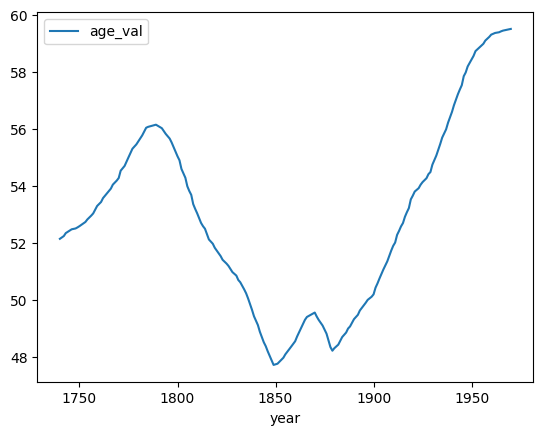

In [81]:
missing_years = {}
missing_years['age'] = wrangle(plt_files[0], 'age')

              year  immigration_val
count   190.000000       190.000000
mean   1909.500000         9.323260
std      54.992424         4.247255
min    1815.000000         1.397797
25%    1862.250000         5.815964
50%    1909.500000         9.710068
75%    1956.750000        13.642646
max    2004.000000        14.771996
Missing years:
 []
Missing years count:
 0
Max year: 2004
Min year: 1815


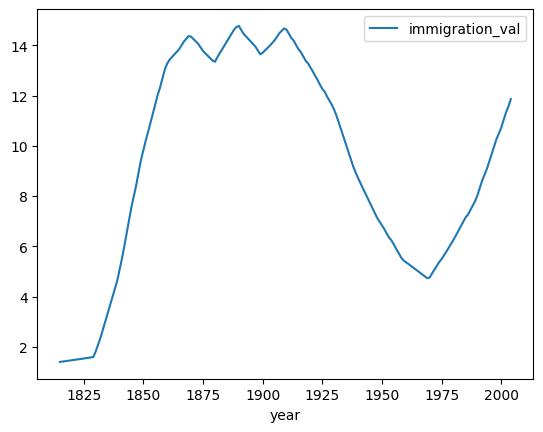

In [82]:
missing_years['immigration'] = wrangle(plt_files[1], 'immigration')

              year  height_val
count   230.000000  230.000000
mean   1854.500000  172.937120
std      66.539462    2.337134
min    1740.000000  169.131249
25%    1797.250000  171.249779
50%    1854.500000  172.858965
75%    1911.750000  173.204669
max    1969.000000  177.833695
Missing years:
 [1742, 1745, 1748, 1751, 1754, 1757, 1760, 1763, 1765, 1768, 1771, 1774, 1777, 1780, 1783, 1786, 1789, 1792, 1795, 1798, 1801, 1804, 1807, 1810, 1813, 1816, 1819, 1822, 1825, 1828, 1849, 1852, 1855, 1858, 1861, 1864, 1867, 1880, 1883, 1886, 1889, 1893, 1899, 1911, 1927, 1937, 1940, 1943, 1946, 1949, 1952, 1955, 1959, 1964, 1967]
Missing years count:
 55
Max year: 1969
Min year: 1740


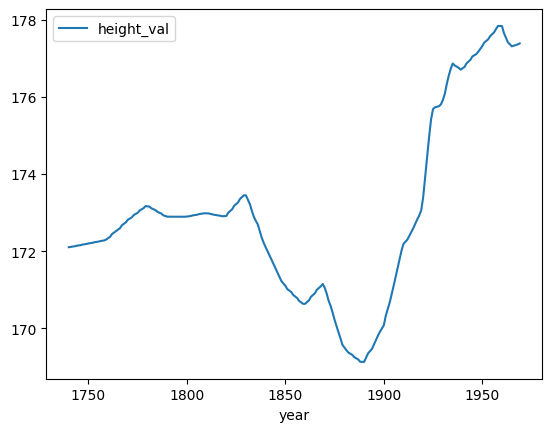

In [83]:
missing_years['height'] = wrangle(plt_files[2], 'height')

              year    hsus_val
count   209.000000  209.000000
mean   1894.000000   28.390705
std      60.477268    7.543801
min    1790.000000   17.770618
25%    1842.000000   21.914681
50%    1894.000000   25.728057
75%    1946.000000   34.935227
max    1998.000000   47.974842
Missing years:
 [1791, 1794, 1796, 1797, 1804, 1813, 1815, 1825, 1830, 1834, 1837, 1839, 1842, 1844, 1845, 1847, 1848, 1850, 1853, 1856, 1858, 1861, 1864, 1866, 1869, 1872, 1874, 1877, 1880, 1882, 1885, 1888, 1897, 1916, 1955, 1958, 1960, 1983, 1990]
Missing years count:
 39
Max year: 1998
Min year: 1790


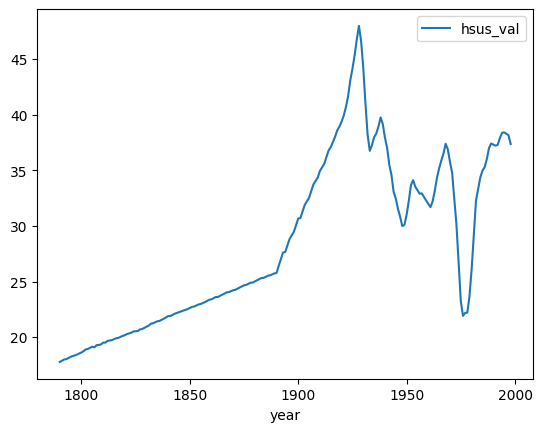

In [84]:
missing_years['hsus'] = wrangle(plt_files[3], 'hsus')

              year  wagegdpratio_val
count   220.000000        220.000000
mean   1899.500000          0.856194
std      63.652704          0.235148
min    1790.000000          0.451819
25%    1844.750000          0.686027
50%    1899.500000          0.822377
75%    1954.250000          1.001199
max    2009.000000          1.544620
Missing years:
 [1902, 1954, 1969]
Missing years count:
 3
Max year: 2009
Min year: 1790


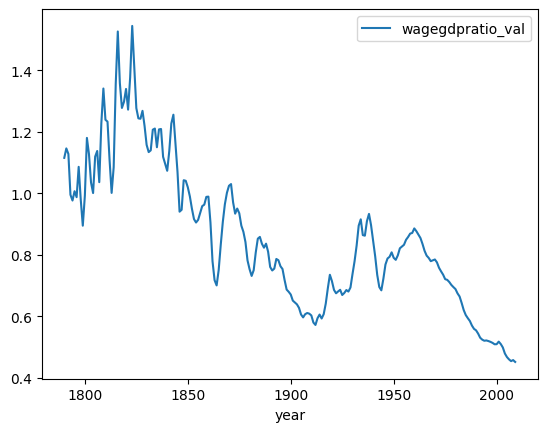

In [85]:
missing_years['wagegdpratio'] = wrangle(plt_files[4], 'wagegdpratio')

              year      evi_val
count   220.000000   220.000000
mean   1899.500000   521.561997
std      63.652704   573.639692
min    1790.000000    25.427471
25%    1844.750000    99.711247
50%    1899.500000   223.191599
75%    1954.250000   904.273147
max    2009.000000  2520.724274
Missing years:
 [1793, 1804, 1815, 1825, 1855, 1865, 1883, 1929, 1939, 1963]
Missing years count:
 10
Max year: 2009
Min year: 1790


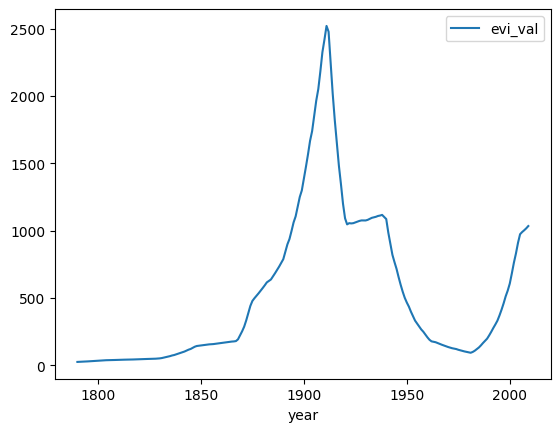

In [86]:
missing_years['evi'] = wrangle(plt_files[5], 'evi')

              year  polarization_val
count   221.000000        221.000000
mean   1900.000000          0.624486
std      63.941379          0.163098
min    1790.000000          0.198197
25%    1845.000000          0.496027
50%    1900.000000          0.630196
75%    1955.000000          0.744874
max    2010.000000          0.974347
Missing years:
 [1953]
Missing years count:
 1
Max year: 2010
Min year: 1790


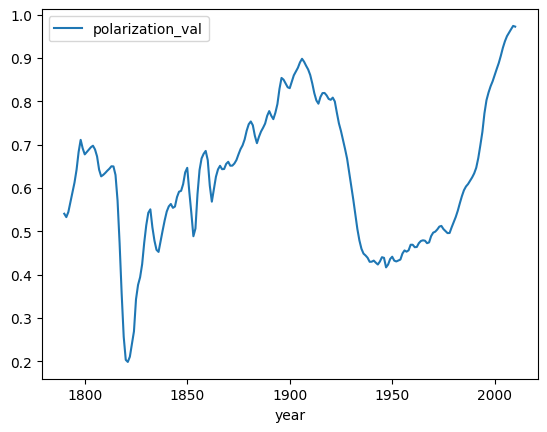

In [87]:
missing_years['polarization'] = wrangle(plt_files[6], 'polarization')

## USPV

### Population

In [88]:
# read and interpolate years linearly
df_pop = pd.read_csv(folder.format('raw/population.csv'), delimiter='\t', header=None)
df_pop.columns = ['year', 'population']


all_years = np.arange(df_pop['year'].min(), df_pop['year'].max() + 1)
all_years = pd.DataFrame({'year': all_years})
df_pop = pd.merge(all_years, df_pop, on='year', how='left')

df_pop = df_pop.interpolate(method='linear')
df_pop['population'] = np.round(df_pop['population'], 0)
df_pop

,year,population
0,1700,250888.0
1,1701,258970.0
2,1702,267053.0
3,1703,275135.0
4,1704,283217.0
...,...,...
316,2016,322367784.0
317,2017,324638158.0
318,2018,326908532.0
319,2019,329178907.0


### Fatalities

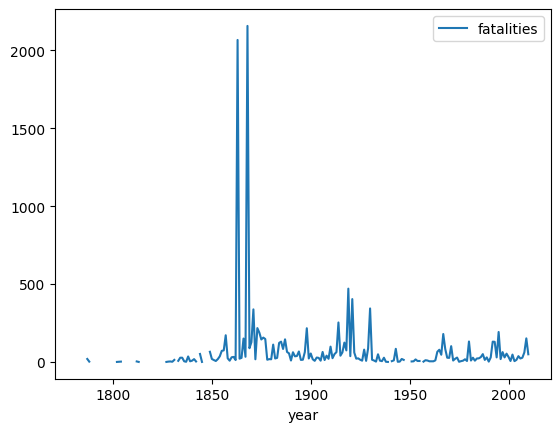

In [89]:
df = pd.read_csv(folder.format('raw/USPV.csv'))
df['year'] = df['year'].astype(int)

# Take mean for years with multiple values
df = df.groupby('year', as_index=False).sum()


# What are the missing years?
all_years = np.arange(df['year'].min(), df['year'].max() + 1)
missing_years['instability'] = [int(y) for y in all_years if y not in df['year'].values]

all_years = pd.DataFrame({'year': all_years})
df = pd.merge(all_years, df, on='year', how='left')

df.plot.line(x='year', y='fatalities')
plt.show()

Based on the plot, Not a lot of missing years and graph is relatively low value when empty so it can be safe to assume missing years are not missing but rather 0. \
We do need to remove the two outliers: justification being that both are of the 'compilation' type, which do not align with the rest of the entries, but because of the 5-year consecutive nature of the index we cannot set it to 0. We simply sest it to the average value between 1850 - 1875. \
Also there's relatively little data prior to 1850 so we drop all the entries before 1825

In [90]:
df_sorted = df.sort_values(by='fatalities', ascending=False)
df_sorted.head(4)

,year,fatalities
86,1868,2156.0
81,1863,2066.0
137,1919,471.0
139,1921,404.0


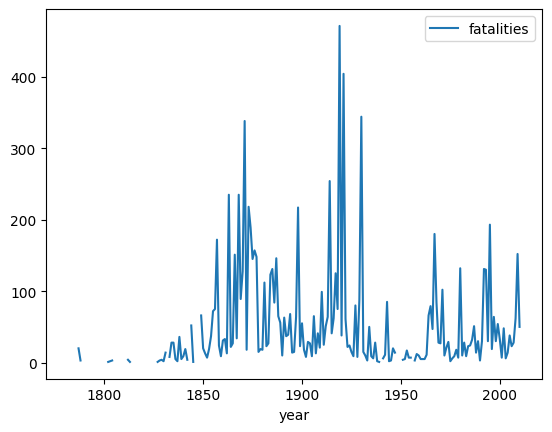

In [91]:
mean_fatalities = df[(df['year'] >= 1850) & (df['year'] <= 1875)]['fatalities'].mean()
df.loc[86,'fatalities'] = mean_fatalities
df.loc[81,'fatalities'] = mean_fatalities
df.plot.line(x='year', y='fatalities')
plt.show()

In [92]:
# Merge with population
df = pd.merge(df, df_pop, on='year', how='left')

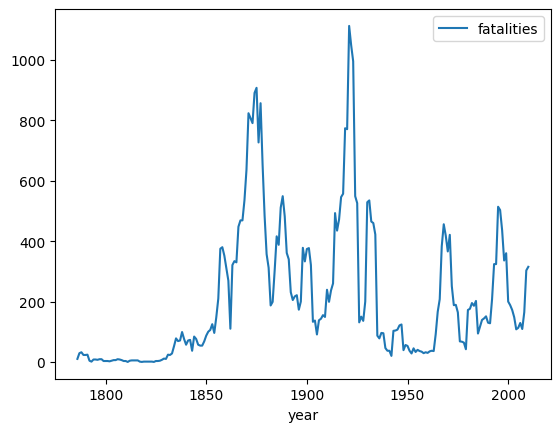

In [93]:
# Calculate the 5-year aggregative fatalities
df = df.fillna(0)
df['fatalities'] = df['fatalities'].rolling(5).sum()
df['population'] = df['population'].rolling(5).sum()
df = df.loc[4:,:]
df.plot.line(x='year', y='fatalities')
plt.show()

In [94]:
# Log cannot take 0 so we need to add 0 entries with 1, should cause minimal distortion
df.loc[df['fatalities']==0, 'fatalities'] = 1

In [95]:
df['population'] = df['population']/1e6/5 # Per 1 million people per 5 years
df['instability'] = np.log(df['fatalities'] / df['population'])

# Take log (the 1 million population is just an additive constant)
df['instability'] = np.log(df['instability'])
df = df.drop(columns=['fatalities', 'population'])

/home/jichaoyang/code/data221/env/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


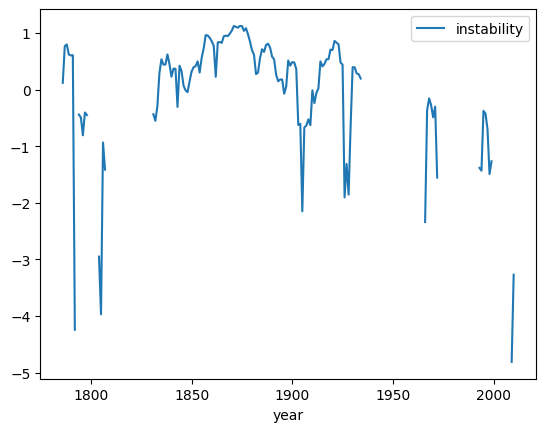

In [96]:
df.to_csv(folder.format('wrangled/instability.csv'), index=False)
df.plot.line(x='year', y='instability')
plt.show()